Steps: 
1. Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

2. Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.

3. Interpret the model's results and analyze the most influential features affecting restaurant ratings.

### Import necessary libraries

In [1]:
import math
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Read Data
data = pd.read_csv('dataset.csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Data Preprocessing

In [3]:
# See if any null value in datasset
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Remove the columns that do not have significant effects on Rating

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
to_drop_columns = columns = ['Restaurant ID','Restaurant Name','Country Code','Address','Cuisines',
                               'Currency','Rating color', 'Address','Locality', 'Locality Verbose']
data_set = data.drop(to_drop_columns, axis=1)

In [6]:
data_set

,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,Makati City,121.027535,14.565443,1100,Yes,No,No,No,3,4.8,Excellent,314
1,Makati City,121.014101,14.553708,1200,Yes,No,No,No,3,4.5,Excellent,591
2,Mandaluyong City,121.056831,14.581404,4000,Yes,No,No,No,4,4.4,Very Good,270
3,Mandaluyong City,121.056475,14.585318,1500,No,No,No,No,4,4.9,Excellent,365
4,Mandaluyong City,121.057508,14.584450,1500,Yes,No,No,No,4,4.8,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,��stanbul,28.977392,41.022793,80,No,No,No,No,3,4.1,Very Good,788
9547,��stanbul,29.041297,41.009847,105,No,No,No,No,3,4.2,Very Good,1034
9548,��stanbul,29.034640,41.055817,170,No,No,No,No,4,3.7,Good,661
9549,��stanbul,29.036019,41.057979,120,No,No,No,No,4,4.0,Very Good,901


## encoding categorical variables

In [7]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_set['City'] = label_encoder.fit_transform(data_set['City'])
data_set['Rating text'] = label_encoder.fit_transform(data_set['Rating text'])


In [8]:
data_set

,City,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,73,121.027535,14.565443,1100,Yes,No,No,No,3,4.8,1,314
1,73,121.014101,14.553708,1200,Yes,No,No,No,3,4.5,1,591
2,75,121.056831,14.581404,4000,Yes,No,No,No,4,4.4,5,270
3,75,121.056475,14.585318,1500,No,No,No,No,4,4.9,1,365
4,75,121.057508,14.584450,1500,Yes,No,No,No,4,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,28.977392,41.022793,80,No,No,No,No,3,4.1,5,788
9547,140,29.041297,41.009847,105,No,No,No,No,3,4.2,5,1034
9548,140,29.034640,41.055817,170,No,No,No,No,4,3.7,2,661
9549,140,29.036019,41.057979,120,No,No,No,No,4,4.0,5,901


In [9]:
#one hot encoding
dataset = pd.get_dummies(data_set, columns=['Has Table booking', 'Has Online delivery','Is delivering now',
                                           'Switch to order menu'])


In [10]:
dataset

,City,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
0,73,121.027535,14.565443,1100,3,4.8,1,314,0,1,1,0,1,0,1
1,73,121.014101,14.553708,1200,3,4.5,1,591,0,1,1,0,1,0,1
2,75,121.056831,14.581404,4000,4,4.4,5,270,0,1,1,0,1,0,1
3,75,121.056475,14.585318,1500,4,4.9,1,365,1,0,1,0,1,0,1
4,75,121.057508,14.584450,1500,4,4.8,1,229,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,140,28.977392,41.022793,80,3,4.1,5,788,1,0,1,0,1,0,1
9547,140,29.041297,41.009847,105,3,4.2,5,1034,1,0,1,0,1,0,1
9548,140,29.034640,41.055817,170,4,3.7,2,661,1,0,1,0,1,0,1
9549,140,29.036019,41.057979,120,4,4.0,5,901,1,0,1,0,1,0,1


### splitting the data into training and testing sets.

In [11]:
# separate dependent and independent variables
x = dataset.drop('Aggregate rating', axis =1)
y = dataset['Aggregate rating']

In [12]:
x.columns

Index(['City', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range',
       'Rating text', 'Votes', 'Has Table booking_No', 'Has Table booking_Yes',
       'Has Online delivery_No', 'Has Online delivery_Yes',
       'Is delivering now_No', 'Is delivering now_Yes',
       'Switch to order menu_No'],
      dtype='object')

In [13]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [14]:
#scaling data
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [16]:
X = pd.DataFrame(X)
X.columns = x.columns
X

,City,Longitude,Latitude,Average Cost for two,Price range,Rating text,Votes,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
0,-0.228533,1.372269,-1.025581,-0.006154,1.319803,-0.465442,0.365202,-2.692181,2.692181,0.587547,-0.587547,0.059771,-0.059771,0.0
1,-0.228533,1.371945,-1.026647,0.000049,1.319803,-0.465442,1.009168,-2.692181,2.692181,0.587547,-0.587547,0.059771,-0.059771,0.0
2,-0.142317,1.372975,-1.024131,0.173743,2.424090,1.895070,0.262911,-2.692181,2.692181,0.587547,-0.587547,0.059771,-0.059771,0.0
3,-0.142317,1.372966,-1.023775,0.018659,2.424090,-0.465442,0.483766,0.371446,-0.371446,0.587547,-0.587547,0.059771,-0.059771,0.0
4,-0.142317,1.372991,-1.023854,0.018659,2.424090,-0.465442,0.167595,-2.692181,2.692181,0.587547,-0.587547,0.059771,-0.059771,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,2.659685,-0.847685,1.378025,-0.069428,1.319803,1.895070,1.467151,0.371446,-0.371446,0.587547,-0.587547,0.059771,-0.059771,0.0
9547,2.659685,-0.846144,1.376849,-0.067878,1.319803,1.895070,2.039049,0.371446,-0.371446,0.587547,-0.587547,0.059771,-0.059771,0.0
9548,2.659685,-0.846305,1.381025,-0.063845,2.424090,0.124686,1.171903,0.371446,-0.371446,0.587547,-0.587547,0.059771,-0.059771,0.0
9549,2.659685,-0.846272,1.381221,-0.066947,2.424090,1.895070,1.729853,0.371446,-0.371446,0.587547,-0.587547,0.059771,-0.059771,0.0


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False, 
                                                    random_state=51)

In [18]:
x_test, x_train

(          City  Longitude  Latitude  Average Cost for two  Price range  \
 7640  0.418083   0.311458  0.251415             -0.055781    -0.888771   
 7641  0.418083   0.311927  0.251508             -0.052679    -0.888771   
 7642  0.418083   0.311979  0.251583             -0.043374     0.215516   
 7643  0.418083   0.312086  0.251229             -0.061984    -0.888771   
 7644  0.418083   0.311865  0.251287             -0.061984    -0.888771   
 ...        ...        ...       ...                   ...          ...   
 9546  2.659685  -0.847685  1.378025             -0.069428     1.319803   
 9547  2.659685  -0.846144  1.376849             -0.067878     1.319803   
 9548  2.659685  -0.846305  1.381025             -0.063845     2.424090   
 9549  2.659685  -0.846272  1.381221             -0.066947     2.424090   
 9550  2.659685  -0.846513  1.374571             -0.070979     0.215516   
 
       Rating text     Votes  Has Table booking_No  Has Table booking_Yes  \
 7640    -1.055570 -0

In [19]:
len(y_train)

7640

In [20]:
y_train,y_test

(0       4.8
 1       4.5
 2       4.4
 3       4.9
 4       4.8
        ... 
 7635    3.3
 7636    3.1
 7637    3.0
 7638    3.1
 7639    3.0
 Name: Aggregate rating, Length: 7640, dtype: float64,
 7640    3.1
 7641    3.2
 7642    2.7
 7643    3.0
 7644    2.8
        ... 
 9546    4.1
 9547    4.2
 9548    3.7
 9549    4.0
 9550    4.0
 Name: Aggregate rating, Length: 1911, dtype: float64)

Text(0.5, 1.0, 'Aggregate Rating')

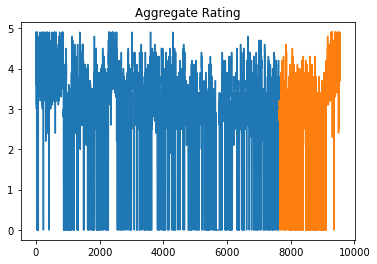

In [21]:
#plt.scatter(dataset['Votes'], dataset['Aggregate rating']
plt.plot(y_train)
plt.plot(y_test)
plt.title('Aggregate Rating')

# Train ML Models and compare results

In [22]:
#Using Linear Regression 
lr = LinearRegression(fit_intercept=True)
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)

#AdaBoost Regression
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
ada_boost_model.fit(x_train, y_train)
ada_boost_predictions = ada_boost_model.predict(x_test)

#Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_model.fit(x_train, y_train)
decision_tree_predictions = decision_tree_model.predict(x_test)

In [23]:
#Evaluate the models
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test, pred)
ada_boost_mse = mean_squared_error(y_test, ada_boost_predictions)
ada_boost_r2 = r2_score(y_test, ada_boost_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)


In [24]:
#results
print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

print("\nAdaBoost Regression Results:")
print("Mean Squared Error (MSE):", ada_boost_mse)
print("R-squared (R2) Score:", ada_boost_r2)

print("\nDecision Tree Regression Results:")
print("Mean Squared Error (MSE):", decision_tree_mse)
print("R-squared (R2) Score:", decision_tree_r2)

Linear Regression Results:
Mean Squared Error (MSE): 2.4770556518805087
R-squared (R2) Score: 0.05381107475181268

AdaBoost Regression Results:
Mean Squared Error (MSE): 0.04761769219849013
R-squared (R2) Score: 0.9818109322776484

Decision Tree Regression Results:
Mean Squared Error (MSE): 0.12100072839718391
R-squared (R2) Score: 0.9537799850925989


In [25]:
#AdaBoost is performing amazing, but we have to check which model is consider
#features in prediction

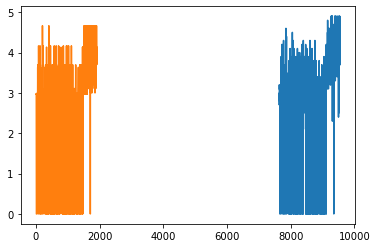

In [26]:
plt.plot(y_test)
plt.plot(ada_boost_predictions)

### most influential features affecting restaurant ratings

Top 7 most influential features affecting restaurant ratings:
                Feature  Importance
6                 Votes    0.662758
5           Rating text    0.317414
2              Latitude    0.011727
1             Longitude    0.007977
0                  City    0.000081
3  Average Cost for two    0.000042
4           Price range    0.000000


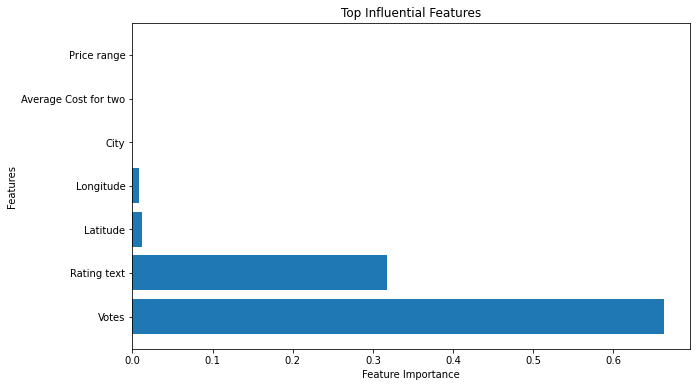

In [27]:
#Get the important features
feature_importances = ada_boost_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
#Sort the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#Display the top 5 most important features
N = 7 
print(f"Top {N} most influential features affecting restaurant ratings:")
print(feature_importance_df.head(N))
#visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(N), feature_importance_df['Importance'].head(N), align='center')
plt.yticks(np.arange(N), feature_importance_df['Feature'].head(N))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Influential Features')
plt.show()

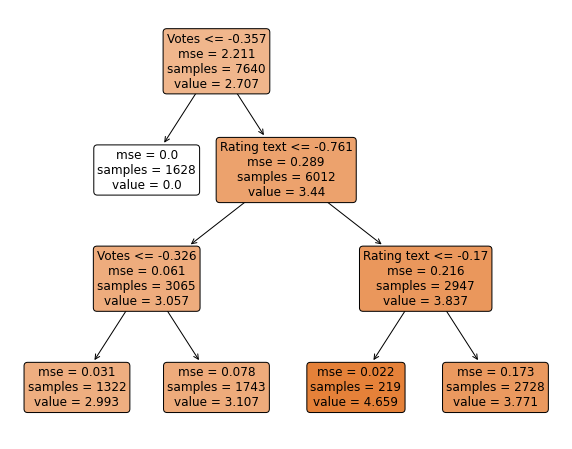

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree_model, filled=True, feature_names=x.columns, rounded=True)
plt.show()

Top 5 most influential features affecting restaurant ratings:
       Feature  Importance
6        Votes    0.933918
5  Rating text    0.066082
0         City    0.000000
1    Longitude    0.000000
2     Latitude    0.000000


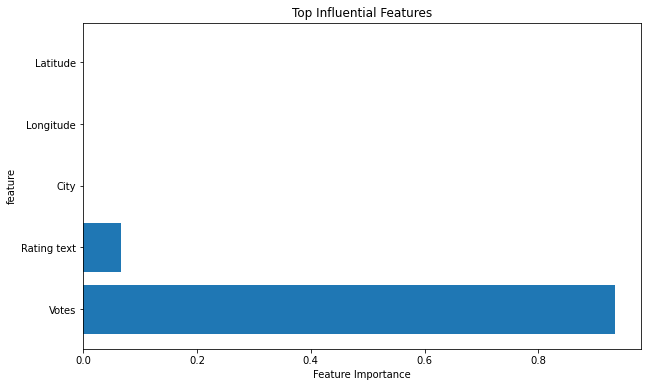

In [29]:
#Get the important features
feature_importances = decision_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
#Sort the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#Display the top 5 most important features
N = 5 
print(f"Top {N} most influential features affecting restaurant ratings:")
print(feature_importance_df.head(N))
#visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(N), feature_importance_df['Importance'].head(N), align='center')
plt.yticks(np.arange(N), feature_importance_df['Feature'].head(N))
plt.xlabel('Feature Importance')
plt.ylabel('feature')
plt.title('Top Influential Features')
plt.show()

